使用库

- numpy
- pandas
- matplotlib

In [246]:
# import pkgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [247]:
# Read csv data

data = pd.read_csv('./ex1data1.txt', header=None)
X, Y = np.array([data.iloc[:, 0]]).T, np.array([data.iloc[:, 1]]).T

print("从ex1data1.txt中读取数据：")
print("X:", X[:5])
print("Y:", Y[:5])


从ex1data1.txt中读取数据：
X: [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
Y: [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


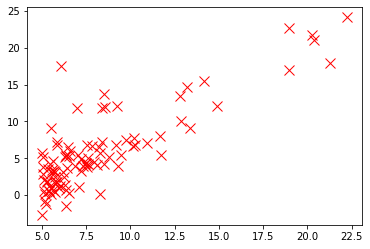

In [248]:
plt.plot(X, Y, 'rx', markersize=10)


In [249]:
# 归一化
X = (X - np.mean(X)) / np.std(X)


In [250]:
X = np.insert(X, 0, np.linspace(1, 1, len(Y)), axis=1)
print("New X:", X[:5])


New X: [[ 1.         -0.53240565]
 [ 1.         -0.68368294]
 [ 1.          0.09319761]
 [ 1.         -0.30042464]
 [ 1.         -0.5974206 ]]


In [251]:
def costFunction(X, Y, theta):
    """代价函数"""
    m = len(Y)
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum((h - Y) ** 2)
    return J


In [252]:
# 代价函数测试
test_J = costFunction(X, Y, np.array([[-1], [2]]))
print("代价函数测试：", test_J)


代价函数测试： 31.22578666227631


In [253]:
def gradientDescent(X, Y, theta, alpha, iterations):
    """梯度下降"""
    m = len(Y)
    theta_history = np.zeros((iterations, 2))
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(h - Y)
        theta_history[[i], :] = theta.T
        J_history[i] = costFunction(X, Y, theta)
    return theta, J_history, theta_history


梯度下降测试： [[5.83888297]
 [4.59284285]]


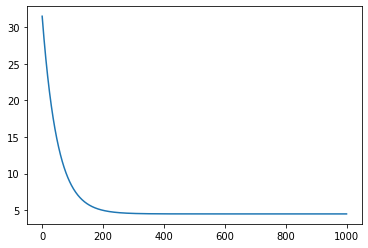

In [254]:
# 梯度下降测试
test_Gradient, J_history, theta_history = gradientDescent(
    X, Y, np.array([[0], [0]]), 0.01, 1000)
plt.plot(J_history)
print("梯度下降测试：", test_Gradient)


In [255]:
theta0_vals = np.linspace(0, 10, 200)
theta1_vals = np.linspace(0, 10, 200)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i, j] = costFunction(X, Y, np.array(
            [[theta0_vals[i]], [theta1_vals[j]]]))

J_vals = np.transpose(J_vals)


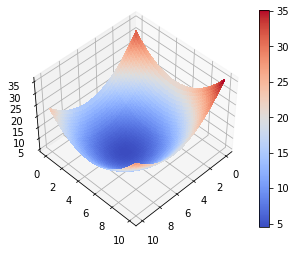

In [256]:
fig, ax1 = plt.subplots(subplot_kw={"projection": "3d"})
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
surf = ax1.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
fig.colorbar(surf)
ax1.elev = 45
ax1.azim = 45

plt.savefig('ex1.svg')
